### Downlaod Amazon Dataset from https://amazon-reviews-2023.github.io/main.html and place them in the ```/data``` folder

In [1]:
import json
import pandas as pd

In [2]:
with open('../../data/meta_Electronics.jsonl', 'r') as f:
    first_line = json.loads(f.readline())


In [3]:
first_line

{'main_category': 'All Electronics',
 'title': 'FS-1051 FATSHARK TELEPORTER V3 HEADSET',
 'average_rating': 3.5,
 'rating_number': 6,
 'features': [],
 'description': ['Teleporter V3 The “Teleporter V3” kit sets a new level of value in the FPV world with Fat Shark renowned performance and quality. The fun of FPV is experienced firsthand through the large screen FPV headset with integrated NexwaveRF receiver technology while simultaneously recording onboard HD footage with the included “PilotHD” camera. The “Teleporter V3” kit comes complete with everything you need to step into the cockpit of your FPV vehicle. We’ve included our powerful 250mW 5.8Ghz transmitter, 25 degree FOV headset (largest QVGA display available), the brand new “PilotHD” camera with live AV out and all the cables, antennas and connectors needed.'],
 'price': None,
 'images': [{'thumb': 'https://m.media-amazon.com/images/I/41qrX56lsYL._AC_US40_.jpg',
   'large': 'https://m.media-amazon.com/images/I/41qrX56lsYL._AC_.

### Filter items that have been observed the first time in year 2022 or later

In [4]:
def filter_data(data: dict) -> dict:
    filter = False
    if int(data['details']['Date First Available'][-4:]) < 2022:
        filter = True
    return filter

In [5]:
with open('../../data/meta_Electronics.jsonl', 'r') as fp:
    with open('../../data/meta_Electronics_2022_2023.jsonl', 'a', encoding='utf-8') as fp_out:
        with open('../../data/meta_Electronics_2022_2023_no_date.jsonl', 'a', encoding='utf-8') as fp_out_no_date:
            i = 0
            for line in fp:
                data = json.loads(line.strip())
                try:
                    filter = filter_data(data)
                    if not filter:
                        json.dump(data, fp_out)
                        fp_out.write('\n')
                        fp_out.flush()
                except:
                    json.dump(data, fp_out_no_date)
                    fp_out_no_date.write('\n')
                    fp_out_no_date.flush()
                i += 1
                if i % 10000 == 0:
                    print(f"Processed {i} lines")

Processed 10000 lines
Processed 20000 lines
Processed 30000 lines
Processed 40000 lines
Processed 50000 lines
Processed 60000 lines
Processed 70000 lines
Processed 80000 lines
Processed 90000 lines
Processed 100000 lines
Processed 110000 lines
Processed 120000 lines
Processed 130000 lines
Processed 140000 lines
Processed 150000 lines
Processed 160000 lines
Processed 170000 lines
Processed 180000 lines
Processed 190000 lines
Processed 200000 lines
Processed 210000 lines
Processed 220000 lines
Processed 230000 lines
Processed 240000 lines
Processed 250000 lines
Processed 260000 lines
Processed 270000 lines
Processed 280000 lines
Processed 290000 lines
Processed 300000 lines
Processed 310000 lines
Processed 320000 lines
Processed 330000 lines
Processed 340000 lines
Processed 350000 lines
Processed 360000 lines
Processed 370000 lines
Processed 380000 lines
Processed 390000 lines
Processed 400000 lines
Processed 410000 lines
Processed 420000 lines
Processed 430000 lines
Processed 440000 lin

### Split the data into two categories: "has main category and "does not have main category"

In [6]:
def filter_category(data: dict) -> dict:
    filter = False
    if data['main_category'] == None:
        filter = True
    return filter

In [7]:
with open('../../data/meta_Electronics_2022_2023.jsonl', 'r') as fp:
    with open('../../data/meta_Electronics_2022_2023_with_category.jsonl', 'a', encoding='utf-8') as fp_out:
        with open('../../data/meta_Electronics_2022_2023_no_category.jsonl', 'a', encoding='utf-8') as fp_out_no_category:
            i = 0
            for line in fp:
                data = json.loads(line.strip())
                try:
                    filter = filter_data(data)
                    if not filter:
                        json.dump(data, fp_out)
                        fp_out.write('\n')
                        fp_out.flush()
                except:
                    json.dump(data, fp_out_no_category)
                    fp_out_no_category.write('\n')
                    fp_out_no_category.flush()
                i += 1
                if i % 10000 == 0:
                    print(f"Processed {i} lines")

Processed 10000 lines
Processed 20000 lines
Processed 30000 lines
Processed 40000 lines
Processed 50000 lines
Processed 60000 lines
Processed 70000 lines
Processed 80000 lines
Processed 90000 lines
Processed 100000 lines
Processed 110000 lines


### Explore distribution by categories

In [8]:
df = pd.read_json('../../data/meta_Electronics_2022_2023_with_category.jsonl', lines=True)

In [9]:
df.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Amazon Home,"Outer Space Planets Stickers(50Pcs),Planetary ...",4.5,50,[PROFESSIONAL STICKER SHOP.There are 50 differ...,"[Features:, - Clear picture and exquisite prin...",3.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Watch Before Buying! Huge Waterpro...,Affoto,"[Electronics, Computers & Accessories, Laptop ...","{'Brand': 'Affoto', 'Color': 'Outer Space', 'S...",B0BPLX8B2K,NaN,NaN,NaN
1,Computers,"Gateway 15.6"" FHD Ultra Slim Budget Notebook, ...",4.1,15,"[【Processor】4 Core, 4 Threads, 4MB Cache, up t...","[Processor:, Intel® Pentium® Silver N5030 Proc...",189.99,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Watch before you order ', 'url': '...",Gateway,"[Electronics, Computers & Accessories, Compute...",{'Standing screen display size': '15.6 Inches'...,B0BYBG1PPD,NaN,NaN,NaN
2,Cell Phones & Accessories,May Chen Compatible with MacBook Pro 16 inch C...,4.5,649,[【 COMPATIBLE WITH 】 Designed to Fits Perfectl...,[May Chen High Quality Plastic Hard Shell Case...,26.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'MOSISO Plastic Hard Shell Compati...,May Chen,"[Electronics, Computers & Accessories, Laptop ...","{'Standing screen display size': '16 Inches', ...",B0822SL7JX,NaN,NaN,NaN
3,All Electronics,"LENTION USB C Docking Station, 10 Gbps USB C&U...",4.4,16,[10-in-1 Docking Station - CB-D65 laptop docki...,[],89.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'LENTION D65 Upgrade Docking Statio...,LENTION,"[Electronics, Computers & Accessories, Laptop ...",{'Package Dimensions': '9.17 x 4.33 x 1.54 inc...,B0BKS1K986,NaN,NaN,NaN
4,All Electronics,1X (No Bluetooth) Eaglewireless Replacement To...,3.0,4,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Eaglewireless,[],{'Package Dimensions': '5.2 x 2.13 x 0.91 inch...,B09MY246CC,NaN,NaN,NaN


<Axes: xlabel='main_category'>

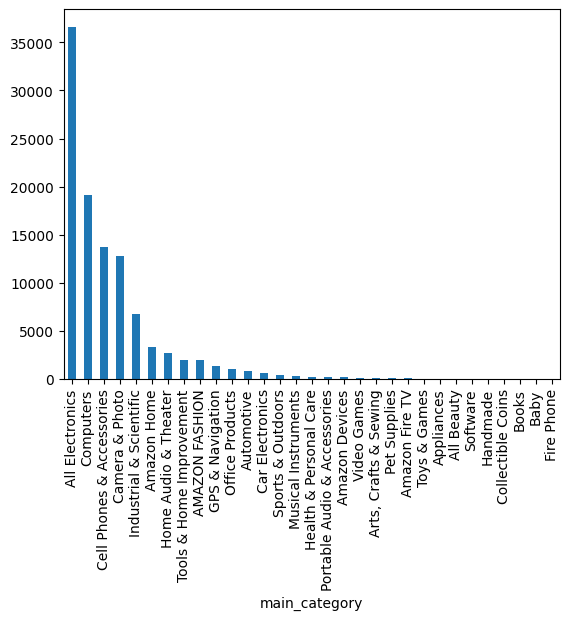

In [10]:
df['main_category'].value_counts().plot(kind='bar')

In [11]:
df_rating_100 = df[df['rating_number'] > 100]

In [12]:
len(df_rating_100)

17994

<Axes: xlabel='main_category'>

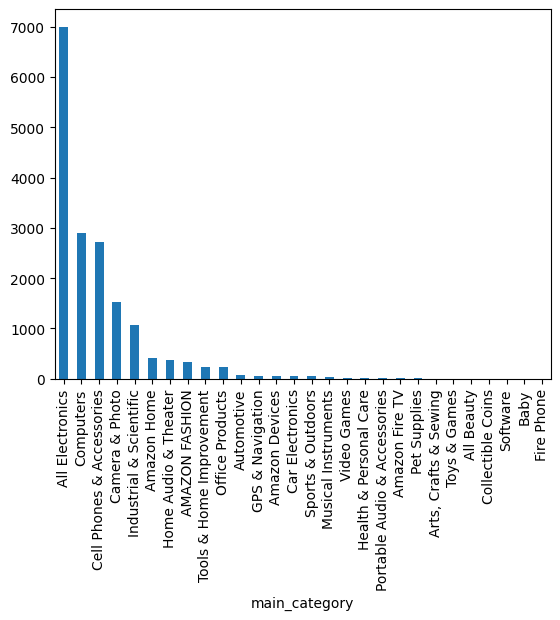

In [13]:
df_rating_100['main_category'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

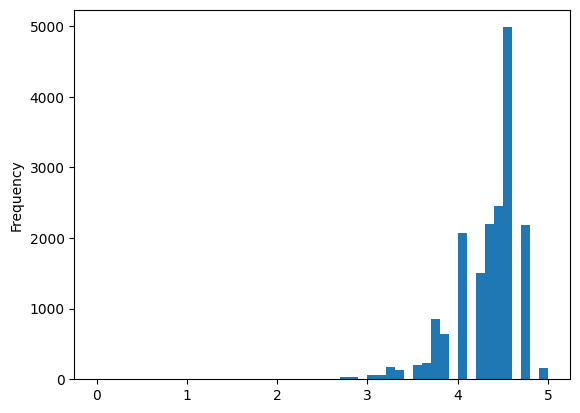

In [14]:
df_rating_100['average_rating'].plot(kind='hist', bins=50, range=(0, 5))

#### Sample 1000 items

In [15]:
df_sample_1000 = df_rating_100.sample(1000, random_state=1)

<Axes: ylabel='Frequency'>

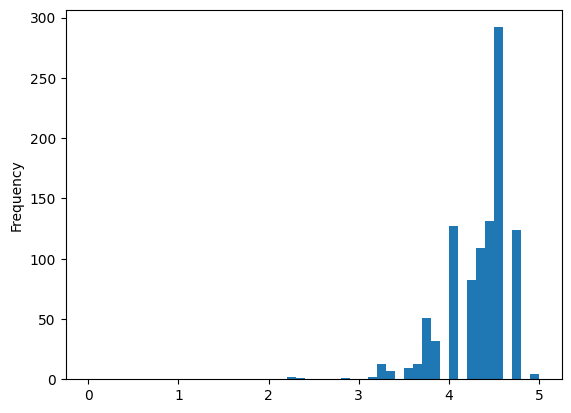

In [16]:
df_sample_1000['average_rating'].plot(kind='hist', bins=50, range=(0, 5))

<Axes: ylabel='Frequency'>

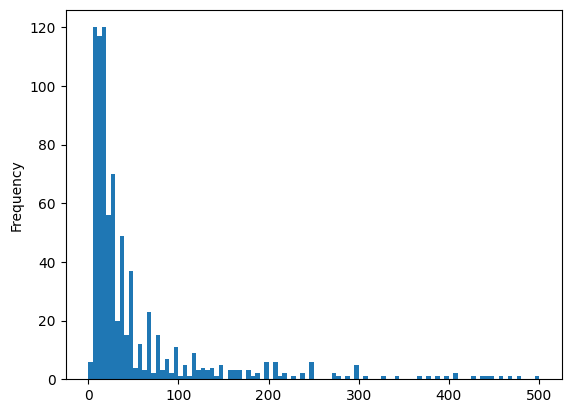

In [17]:
df_sample_1000['price'].plot(kind='hist', bins=100, range=(0, 500))

<Axes: xlabel='main_category'>

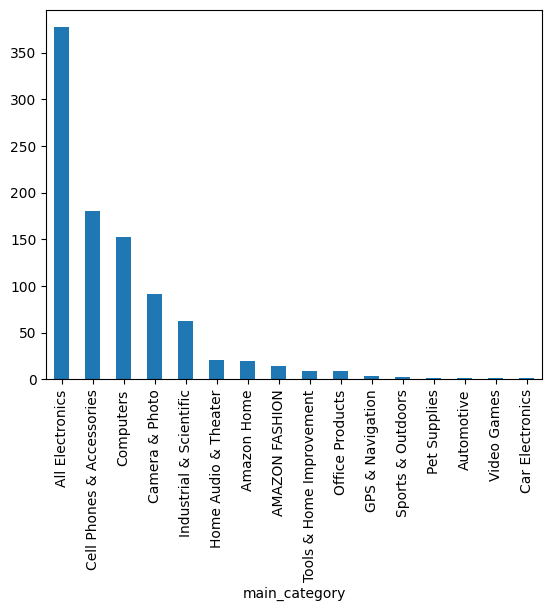

In [18]:
df_sample_1000['main_category'].value_counts().plot(kind='bar')

In [19]:
df_rating_100.to_json('../../data/meta_Electronics_2022_2023_with_category_rating_100.jsonl', orient='records', lines=True)

In [20]:
df_sample_1000.to_json('../../data/meta_Electronics_2022_2023_with_category_rating_100_sample_1000.jsonl', orient='records', lines=True)

### Extract ratings that matches the sample data

In [21]:
df_rating_100 = pd.read_json('../../data/meta_Electronics_2022_2023_with_category_rating_100.jsonl', lines=True)
df_sample_1000 = pd.read_json('../../data/meta_Electronics_2022_2023_with_category_rating_100_sample_1000.jsonl', lines=True)


In [22]:
with open('../../data/Electronics.jsonl', 'r') as fp:
    with open('../../data/Electronics_2022_2023_with_category_rating_100.jsonl', 'a', encoding='utf-8') as fp_out:
        id_list = set(df_rating_100['parent_asin'].values)
        i = 0
        for line in fp:
            data = json.loads(line.strip())
            if data['parent_asin'] in id_list:
                json.dump(data, fp_out)
                fp_out.write('\n')
                fp_out.flush()
            i += 1
            if i % 10000 == 0:
                print(f"Processed {i} lines")

Processed 10000 lines
Processed 20000 lines
Processed 30000 lines
Processed 40000 lines
Processed 50000 lines
Processed 60000 lines
Processed 70000 lines
Processed 80000 lines
Processed 90000 lines
Processed 100000 lines
Processed 110000 lines
Processed 120000 lines
Processed 130000 lines
Processed 140000 lines
Processed 150000 lines
Processed 160000 lines
Processed 170000 lines
Processed 180000 lines
Processed 190000 lines
Processed 200000 lines
Processed 210000 lines
Processed 220000 lines
Processed 230000 lines
Processed 240000 lines
Processed 250000 lines
Processed 260000 lines
Processed 270000 lines
Processed 280000 lines
Processed 290000 lines
Processed 300000 lines
Processed 310000 lines
Processed 320000 lines
Processed 330000 lines
Processed 340000 lines
Processed 350000 lines
Processed 360000 lines
Processed 370000 lines
Processed 380000 lines
Processed 390000 lines
Processed 400000 lines
Processed 410000 lines
Processed 420000 lines
Processed 430000 lines
Processed 440000 lin

In [23]:
with open('../../data/Electronics_2022_2023_with_category_rating_100.jsonl', 'r') as fp:
    with open('../../data/Electronics_2022_2023_with_category_rating_100_sample_1000.jsonl', 'a', encoding='utf-8') as fp_out:
        id_list = set(df_sample_1000['parent_asin'].values)
        i = 0
        for line in fp:
            data = json.loads(line.strip())
            if data['parent_asin'] in id_list:
                json.dump(data, fp_out)
                fp_out.write('\n')
                fp_out.flush()
            i += 1
            if i % 10000 == 0:
                print(f"Processed {i} lines")

Processed 10000 lines
Processed 20000 lines
Processed 30000 lines
Processed 40000 lines
Processed 50000 lines
Processed 60000 lines
Processed 70000 lines
Processed 80000 lines
Processed 90000 lines
Processed 100000 lines
Processed 110000 lines
Processed 120000 lines
Processed 130000 lines
Processed 140000 lines
Processed 150000 lines
Processed 160000 lines
Processed 170000 lines
Processed 180000 lines
Processed 190000 lines
Processed 200000 lines
Processed 210000 lines
Processed 220000 lines
Processed 230000 lines
Processed 240000 lines
Processed 250000 lines
Processed 260000 lines
Processed 270000 lines
Processed 280000 lines
Processed 290000 lines
Processed 300000 lines
Processed 310000 lines
Processed 320000 lines
Processed 330000 lines
Processed 340000 lines
Processed 350000 lines
Processed 360000 lines
Processed 370000 lines
Processed 380000 lines
Processed 390000 lines
Processed 400000 lines
Processed 410000 lines
Processed 420000 lines
Processed 430000 lines
Processed 440000 lin